In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("../Datasets/air_traffic_data.csv")

In [3]:
df

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271,Deplaned,27271,2005,July
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131,Enplaned,29131,2005,July
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415,Thru / Transit * 2,10830,2005,July
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156,Deplaned,35156,2005,July
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090,Enplaned,34090,2005,July
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15002,201603,Virgin America,VX,Virgin America,VX,Domestic,US,Enplaned,Low Fare,Terminal 2,D,194636,Enplaned,194636,2016,March
15003,201603,Virgin America,VX,Virgin America,VX,International,Mexico,Deplaned,Low Fare,International,A,4189,Deplaned,4189,2016,March
15004,201603,Virgin America,VX,Virgin America,VX,International,Mexico,Enplaned,Low Fare,Terminal 2,D,4693,Enplaned,4693,2016,March
15005,201603,Virgin Atlantic,VS,Virgin Atlantic,VS,International,Europe,Deplaned,Other,International,A,12313,Deplaned,12313,2016,March


# Data Preparation:

### Checking Datatypes Of All Columns In Dataframe:

In [4]:
df.dtypes

Activity Period                 int64
Operating Airline              object
Operating Airline IATA Code    object
Published Airline              object
Published Airline IATA Code    object
GEO Summary                    object
GEO Region                     object
Activity Type Code             object
Price Category Code            object
Terminal                       object
Boarding Area                  object
Passenger Count                 int64
Adjusted Activity Type Code    object
Adjusted Passenger Count        int64
Year                            int64
Month                          object
dtype: object

### Replacing WhiteSpaces In Column Names With Underscore:

In [5]:
df.columns = df.columns.str.replace(' ', '_', regex=True)

In [6]:
df

,Activity_Period,Operating_Airline,Operating_Airline_IATA_Code,Published_Airline,Published_Airline_IATA_Code,GEO_Summary,GEO_Region,Activity_Type_Code,Price_Category_Code,Terminal,Boarding_Area,Passenger_Count,Adjusted_Activity_Type_Code,Adjusted_Passenger_Count,Year,Month
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271,Deplaned,27271,2005,July
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131,Enplaned,29131,2005,July
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415,Thru / Transit * 2,10830,2005,July
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156,Deplaned,35156,2005,July
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090,Enplaned,34090,2005,July
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15002,201603,Virgin America,VX,Virgin America,VX,Domestic,US,Enplaned,Low Fare,Terminal 2,D,194636,Enplaned,194636,2016,March
15003,201603,Virgin America,VX,Virgin America,VX,International,Mexico,Deplaned,Low Fare,International,A,4189,Deplaned,4189,2016,March
15004,201603,Virgin America,VX,Virgin America,VX,International,Mexico,Enplaned,Low Fare,Terminal 2,D,4693,Enplaned,4693,2016,March
15005,201603,Virgin Atlantic,VS,Virgin Atlantic,VS,International,Europe,Deplaned,Other,International,A,12313,Deplaned,12313,2016,March


### Checking Whether There Are Null Values In Our Data:

In [7]:
df.isnull().sum()

Activity_Period                 0
Operating_Airline               0
Operating_Airline_IATA_Code    54
Published_Airline               0
Published_Airline_IATA_Code    54
GEO_Summary                     0
GEO_Region                      0
Activity_Type_Code              0
Price_Category_Code             0
Terminal                        0
Boarding_Area                   0
Passenger_Count                 0
Adjusted_Activity_Type_Code     0
Adjusted_Passenger_Count        0
Year                            0
Month                           0
dtype: int64

In [8]:
df.Operating_Airline_IATA_Code.unique()

array(['TZ', 'AC', 'CA', 'AF', 'NZ', 'FL', 'AS', 'NH', 'AA', 'MQ', 'OZ',
       'EV', '4T', 'BA', 'CX', 'CI', 'DL', 'BR', 'F9', 'HA', 'QX', 'FI',
       'DH', 'JL', 'KL', 'KE', 'LH', 'YV', 'MX', 'YX', 'NW', 'PR', 'SQ',
       'OO', 'SY', 'TA', 'US ', 'UA', 'VS', 'WS', nan, 'GL', 'QK', 'QF',
       'A8', 'NK', 'XP', 'EZ', 'AM', 'B6', 'XE', 'WN', 'VX', 'EI', 'G4',
       '9W', 'BBB', 'EK', 'XJ', 'WO', 'AB', 'RW', 'LX', 'LP', 'SE', 'MU',
       'SK', '5Y', 'CP', 'EY', 'CZ', 'TK', 'CM', 'AI'], dtype=object)

### Replacing All The Null Values With Unknown:

In [9]:
df.Operating_Airline_IATA_Code = df.Operating_Airline_IATA_Code.fillna('Unkown')

In [10]:
df.Published_Airline_IATA_Code.unique()

array(['TZ', 'AC', 'CA', 'AF', 'NZ', 'FL', 'AS', 'NH', 'AA', 'OZ', 'DL',
       '4T', 'BA', 'CX', 'CI', 'BR', 'F9', 'HA', 'FI', 'DH', 'JL', 'KL',
       'KE', 'LH', 'US ', 'MX', 'YX', 'NW', 'PR', 'SQ', 'UA', 'SY', 'TA',
       'VS', 'WS', nan, 'GL', 'QF', 'A8', 'NK', 'XP', 'EZ', 'AM', 'B6',
       'WN', 'VX', 'EI', 'G4', '9W', 'BBB', 'EK', 'WO', 'AB', 'RW', 'LX',
       'LP', 'SE', 'MU', 'SK', '5Y', 'EY', 'CZ', 'TK', 'CM', 'AI'],
      dtype=object)

In [11]:
df.Published_Airline_IATA_Code = df.Published_Airline_IATA_Code.fillna('Unknown')

### Checking Whether There Are Entries With Almost Same Names:

In [12]:
df.Operating_Airline.unique()

array(['ATA Airlines', 'Air Canada ', 'Air China', 'Air France',
       'Air New Zealand', 'AirTran Airways', 'Alaska Airlines',
       'All Nippon Airways', 'American Airlines',
       'American Eagle Airlines', 'Asiana Airlines',
       'Atlantic Southeast Airlines', 'BelAir Airlines',
       'British Airways', 'Cathay Pacific', 'China Airlines',
       'Delta Air Lines', 'EVA Airways', 'Frontier Airlines',
       'Hawaiian Airlines', 'Horizon Air ', 'Icelandair',
       'Independence Air', 'Japan Airlines', 'KLM Royal Dutch Airlines',
       'Korean Air Lines', 'Lufthansa German Airlines', 'Mesa Airlines',
       'Mexicana Airlines', 'Midwest Airlines', 'Northwest Airlines',
       'Philippine Airlines', 'Singapore Airlines', 'SkyWest Airlines',
       'Sun Country Airlines', 'TACA', 'US Airways', 'United Airlines',
       'United Airlines - Pre 07/01/2013', 'Virgin Atlantic',
       'WestJet Airlines', 'Boeing Company', 'Miami Air International',
       'Air Canada Jazz', 'Qantas A

### Fixing Duplicate Entries In Data:

In [13]:
df.Operating_Airline = df.Operating_Airline.str.replace('United Airlines - Pre 07/01/2013', 'United Airlines', regex=True)

In [14]:
df.Published_Airline.unique()

array(['ATA Airlines', 'Air Canada ', 'Air China', 'Air France',
       'Air New Zealand', 'AirTran Airways', 'Alaska Airlines',
       'All Nippon Airways', 'American Airlines', 'Asiana Airlines',
       'Delta Air Lines', 'BelAir Airlines', 'British Airways',
       'Cathay Pacific', 'China Airlines', 'EVA Airways',
       'Frontier Airlines', 'Hawaiian Airlines', 'Icelandair',
       'Independence Air', 'Japan Airlines', 'KLM Royal Dutch Airlines',
       'Korean Air Lines', 'Lufthansa German Airlines', 'US Airways',
       'Mexicana Airlines', 'Midwest Airlines', 'Northwest Airlines',
       'Philippine Airlines', 'Singapore Airlines',
       'United Airlines - Pre 07/01/2013', 'Sun Country Airlines', 'TACA',
       'United Airlines', 'Virgin Atlantic', 'WestJet Airlines',
       'Boeing Company', 'Miami Air International', 'Qantas Airways',
       'Ameriflight', 'Spirit Airlines', 'Xtra Airways',
       'Evergreen International Airlines', 'Aeromexico',
       'JetBlue Airways ', '

In [15]:
df.Published_Airline = df.Published_Airline.str.replace('United Airlines - Pre 07/01/2013', 'United Airlines', regex=True)

In [16]:
df.GEO_Region.unique()

array(['US', 'Canada', 'Asia', 'Europe', 'Australia / Oceania', 'Mexico',
       'Central America', 'Middle East', 'South America'], dtype=object)

In [17]:
df.GEO_Region = df.GEO_Region.str.replace('Australia / Oceania', 'Oceania')

In [18]:
df.Activity_Type_Code.unique()

array(['Deplaned', 'Enplaned', 'Thru / Transit'], dtype=object)

In [19]:
df.Terminal.unique()

array(['Terminal 1', 'International', 'Terminal 3', 'Other', 'Terminal 2'],
      dtype=object)

In [20]:
df.Adjusted_Activity_Type_Code.unique()

array(['Deplaned', 'Enplaned', 'Thru / Transit * 2'], dtype=object)

### Converting Activity Period Column To Its Original DataType: 

In [21]:
df.Activity_Period = pd.to_datetime(df.Activity_Period,format='%Y%m')

In [22]:
df

,Activity_Period,Operating_Airline,Operating_Airline_IATA_Code,Published_Airline,Published_Airline_IATA_Code,GEO_Summary,GEO_Region,Activity_Type_Code,Price_Category_Code,Terminal,Boarding_Area,Passenger_Count,Adjusted_Activity_Type_Code,Adjusted_Passenger_Count,Year,Month
0,2005-07-01,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271,Deplaned,27271,2005,July
1,2005-07-01,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131,Enplaned,29131,2005,July
2,2005-07-01,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415,Thru / Transit * 2,10830,2005,July
3,2005-07-01,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156,Deplaned,35156,2005,July
4,2005-07-01,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090,Enplaned,34090,2005,July
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15002,2016-03-01,Virgin America,VX,Virgin America,VX,Domestic,US,Enplaned,Low Fare,Terminal 2,D,194636,Enplaned,194636,2016,March
15003,2016-03-01,Virgin America,VX,Virgin America,VX,International,Mexico,Deplaned,Low Fare,International,A,4189,Deplaned,4189,2016,March
15004,2016-03-01,Virgin America,VX,Virgin America,VX,International,Mexico,Enplaned,Low Fare,Terminal 2,D,4693,Enplaned,4693,2016,March
15005,2016-03-01,Virgin Atlantic,VS,Virgin Atlantic,VS,International,Europe,Deplaned,Other,International,A,12313,Deplaned,12313,2016,March


# Exploratory Data Analysis (EDA):

### Finding The Key Statistics For Passenger Counts And Their Distribution:

In [23]:
a = df.describe()

In [24]:
a

,Activity_Period,Passenger_Count,Adjusted_Passenger_Count,Year
count,15007,15007.000000,15007.000000,15007.000000
mean,2010-11-05 19:37:51.020190464,29240.521090,29331.917105,2010.385220
min,2005-07-01 00:00:00,1.000000,1.000000,2005.000000
25%,2008-03-01 00:00:00,5373.500000,5495.500000,2008.000000
50%,2010-11-01 00:00:00,9210.000000,9354.000000,2010.000000
75%,2013-08-01 00:00:00,21158.500000,21182.000000,2013.000000
max,2016-03-01 00:00:00,659837.000000,659837.000000,2016.000000
std,NaN,58319.509284,58284.182219,3.137589


### Finding The Top 5 Region With Highest Passenger Counts:

In [25]:
hp = df.groupby('GEO_Region')['Passenger_Count'].sum().nlargest(5)
hp

GEO_Region
US        338141001
Asia       43972770
Europe     26646558
Canada     13865159
Mexico      7998587
Name: Passenger_Count, dtype: int64

### Finding The Top 5 Region With Lowest Passenger Counts:

In [26]:
lp = df.groupby('GEO_Region')['Passenger_Count'].sum().nsmallest(5)
lp

GEO_Region
South America       250741
Central America    1355400
Middle East        1852943
Oceania            4729341
Mexico             7998587
Name: Passenger_Count, dtype: int64

### Among all regions, South America has the lowest passenger traffic, around 250,000 followed by Central America, indicating relatively limited air travel activity compared to other regions.
### Middle East and Oceania shows moderate traffic.

### Finding The Average Passenger Counts Over The Regions:

In [27]:
ap = df.groupby('GEO_Region')['Passenger_Count'].mean()
ap

GEO_Region
Asia               13435.004583
Canada              9777.968265
Central America     4946.715328
Europe             12755.652465
Mexico              7173.620628
Middle East         8658.612150
Oceania             6417.016282
South America       2786.011111
US                 58330.343454
Name: Passenger_Count, dtype: float64

### Displaying Top 5 Regions With Both Highest & Lowest Passenger Counts By Using Bar Plot:

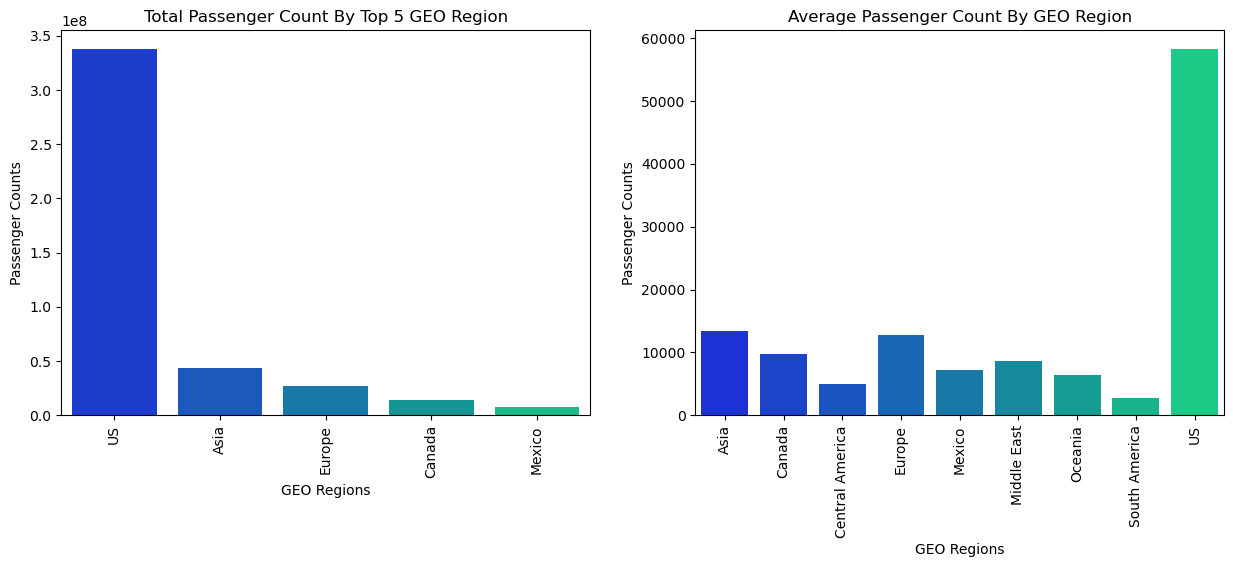

In [28]:
f = plt.figure(figsize=[15,5])

plt.subplot(121)
sb.barplot(x=hp.index, y=hp.values, palette='winter')
plt.title("Total Passenger Count By Top 5 GEO Region")
plt.xlabel("GEO Regions")
plt.ylabel("Passenger Counts")
plt.xticks(rotation=90)

plt.subplot(122)
sb.barplot(x=ap.index, y=ap.values, palette='winter')
plt.title("Average Passenger Count By GEO Region")
plt.xlabel("GEO Regions")
plt.ylabel("Passenger Counts")
plt.xticks(rotation=90)

plt.show()

### The United States has the highest volume of passenger traffic, followed by Asia, Europe, Canada, and Mexico. These constitute the top five regions with the greatest passenger traffic.
### The United States also records the highest average passenger traffic, indicating that it is the most frequently traveled-to region. This is followed by Asia and Europe, which also experience substantial passenger volumes, though lower than the United States. 

### Displaying Passenger Counts By Activity Type By Using Box Plot:

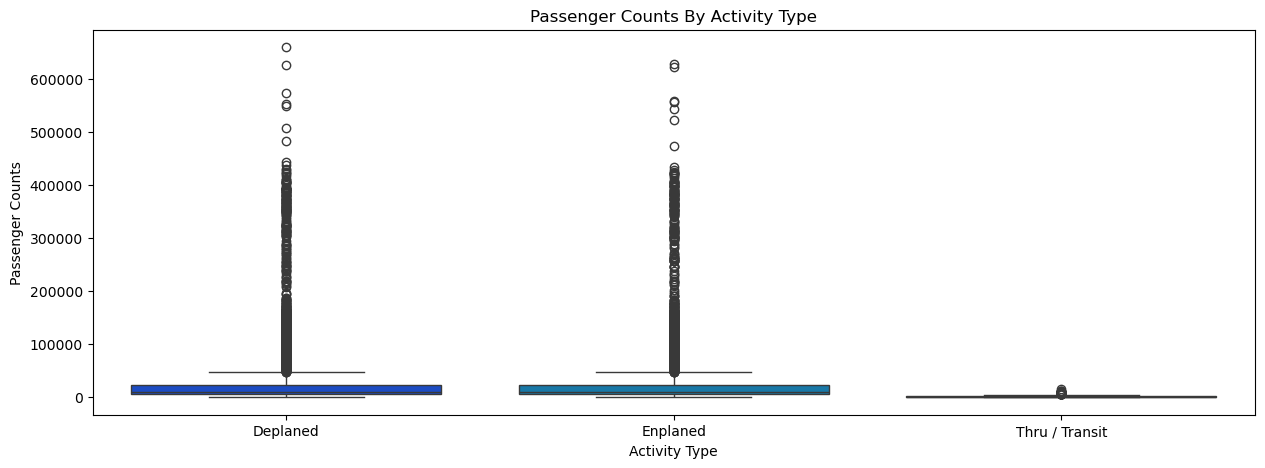

In [40]:
plt.figure(figsize=[15,5])
sb.boxplot(x=df.Activity_Type_Code, y=df.Passenger_Count, palette='winter')
plt.title("Passenger Counts By Activity Type")
plt.xlabel("Activity Type")
plt.ylabel("Passenger Counts")
plt.show()


### Based on the data, the majority of passenger traffic consists of deplaned passengers, followed by those who are enplaning. 
### The lowest passenger volumes are observed among transit passengers, indicating that relatively few travelers pass through the airport solely to connect to another flight.


# Temporal Analysis:

### Passenger Counts Over The Years & Months: 

In [30]:
T = pd.pivot_table(df, values='Passenger_Count', index='Month', columns='Year', aggfunc='sum')
T

Year,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Month,,,,,,,,,,,,
April,NaN,2773293.0,2869247.0,3029021.0,3024973.0,3139059.0,3200527.0,3563007.0,3604104.0,3881893.0,4021677.0,NaN
August,3195866.0,3143839.0,3436417.0,3612297.0,3650668.0,3771842.0,3917884.0,4356216.0,4347059.0,4524918.0,4796653.0,NaN
December,2671797.0,2698200.0,2903637.0,2962937.0,3074209.0,3167124.0,3441693.0,3443039.0,3814984.0,3855835.0,4129052.0,NaN
February,NaN,2223024.0,2304990.0,2595676.0,2359800.0,2515361.0,2610667.0,2998119.0,2966477.0,3078405.0,3248144.0,3543639.0
January,NaN,2448889.0,2507430.0,2670053.0,2644539.0,2785466.0,2883810.0,3211600.0,3204637.0,3432625.0,3550084.0,3748529.0
July,3225769.0,3227605.0,3382382.0,3603946.0,3649702.0,3765824.0,3935589.0,4284443.0,4176486.0,4499221.0,4801148.0,NaN
June,NaN,3071396.0,3263621.0,3453751.0,3419595.0,3612886.0,3766323.0,4107195.0,4146797.0,4321833.0,4558511.0,NaN
March,NaN,2708778.0,2820085.0,3127387.0,2925918.0,3105958.0,3129205.0,3472440.0,3593364.0,3765504.0,4001521.0,4137679.0
May,NaN,2829000.0,3056934.0,3305954.0,3177100.0,3380355.0,3547804.0,3820570.0,3933016.0,4147096.0,4361140.0,NaN


### Showing The Fluctuation Of Passenger Counts Over The Months:

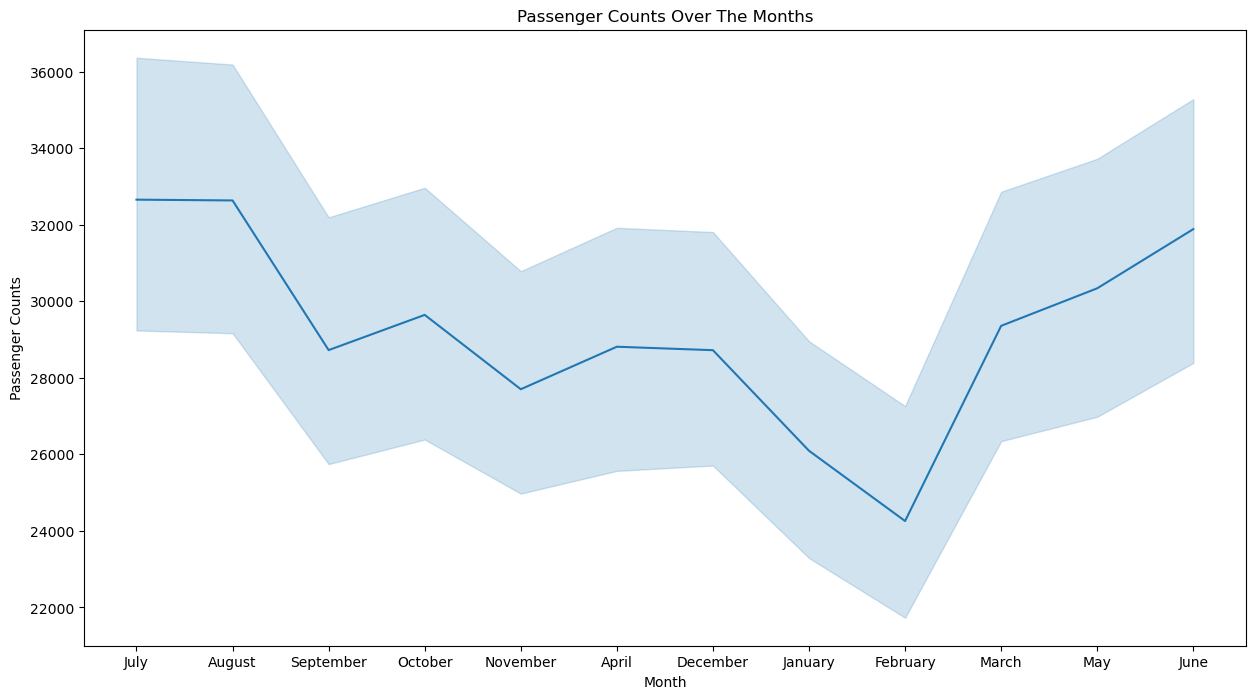

In [31]:
plt.figure(figsize=[15,8])
sb.lineplot(x=df.Month, y=df.Passenger_Count)
plt.title("Passenger Counts Over The Months")
plt.xlabel("Month")
plt.ylabel("Passenger Counts")
plt.show()

### Based on the data, the highest volume of passenger traffic occurs in July and August, indicating that air travel peaks during these summer months compared to others. 
### Following this period, traffic declines is noticed at September, November, and February. 
### After the peak months, passenger traffic reaches its minimum in February, suggesting a seasonal dip in air travel demand.
### A gradual increase is observed again between March and June; however, the levels during these months do not reach the peak observed in July and August.

### Displaying Passenger Counts Over Months And Years By Using Heat Map:

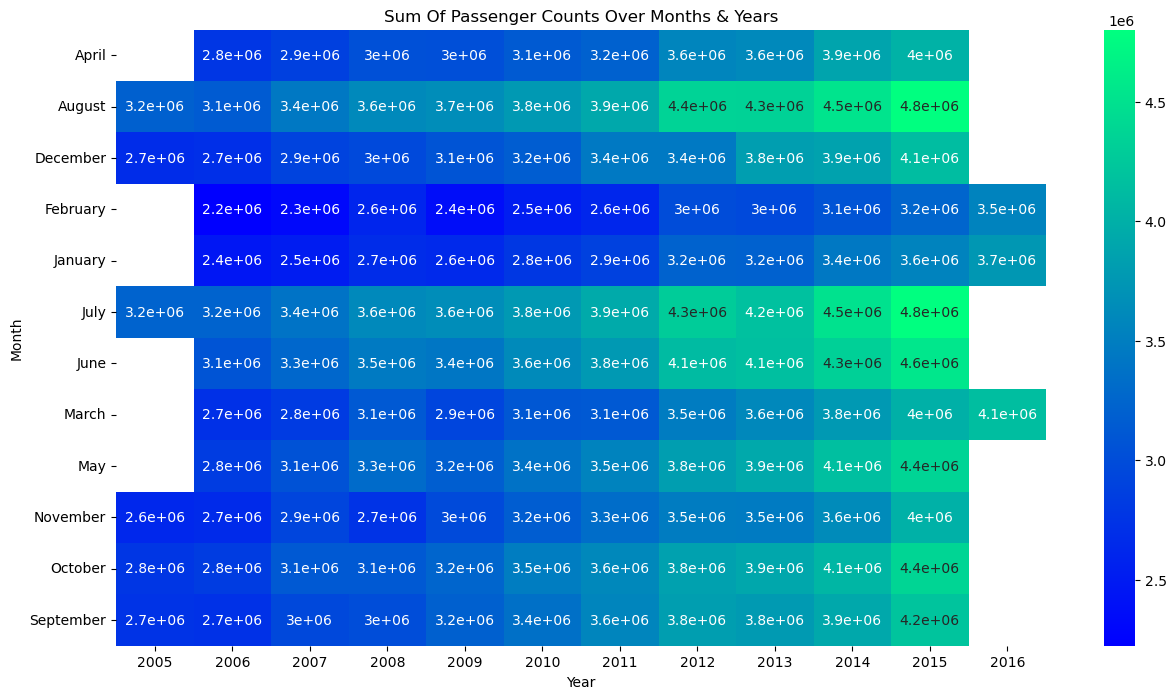

In [32]:
plt.figure(figsize=[15,8])
sb.heatmap(T,annot=True, cmap='winter')
plt.title("Sum Of Passenger Counts Over Months & Years")
plt.show()

### Throughout the period from 2005 to 2015, the months of July and August consistently recorded the highest passenger traffic, indicating that peak travel demand occurs during these months every year, not just in isolated instances. 
### Following these peak months, June showed the next highest levels of passenger traffic, particularly during the years 2006 to 2015.
### Between 2005 and 2011, passenger traffic exhibited relative stability, with only moderate variations observed during certain months.
### In contrast, the period from 2012 to 2016 was characterized by a marked upward trend in passenger traffic, with pronounced increases during peak travel months, notably June, July, and August.


# Airline Analysis:

### Finding Top 10 Airlines With Highest Passenger Traffic:

In [33]:
lp1 = df.groupby('Operating_Airline')['Passenger_Count'].sum().nlargest(10)

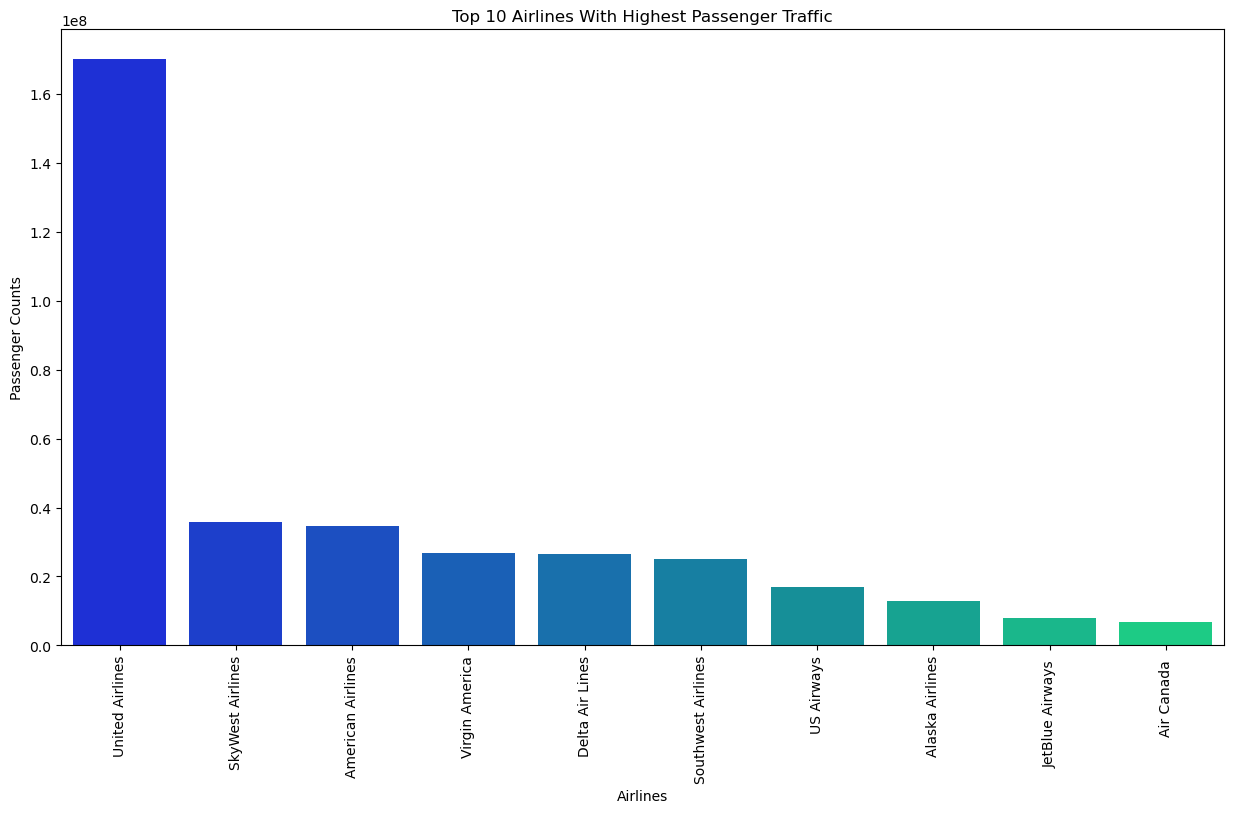

In [34]:
plt.figure(figsize=[15,8])
sb.barplot(x=lp1.index, y=lp1.values, palette='winter')
plt.title("Top 10 Airlines With Highest Passenger Traffic")
plt.xlabel("Airlines")
plt.ylabel("Passenger Counts")
plt.xticks(rotation=90)
plt.show()

### United Airlines consistently records the highest passenger traffic, indicating a strong preference among travelers compared with other carriers. 

### This is followed by SkyWest Airlines and American Airlines, which also maintain substantial passenger volumes, though notably lower than United Airlines.


### Finding Top 10 Airlines With Lowest Passenger Traffic:

In [35]:
lp2 = df.groupby('Operating_Airline')['Passenger_Count'].sum().nsmallest(10)

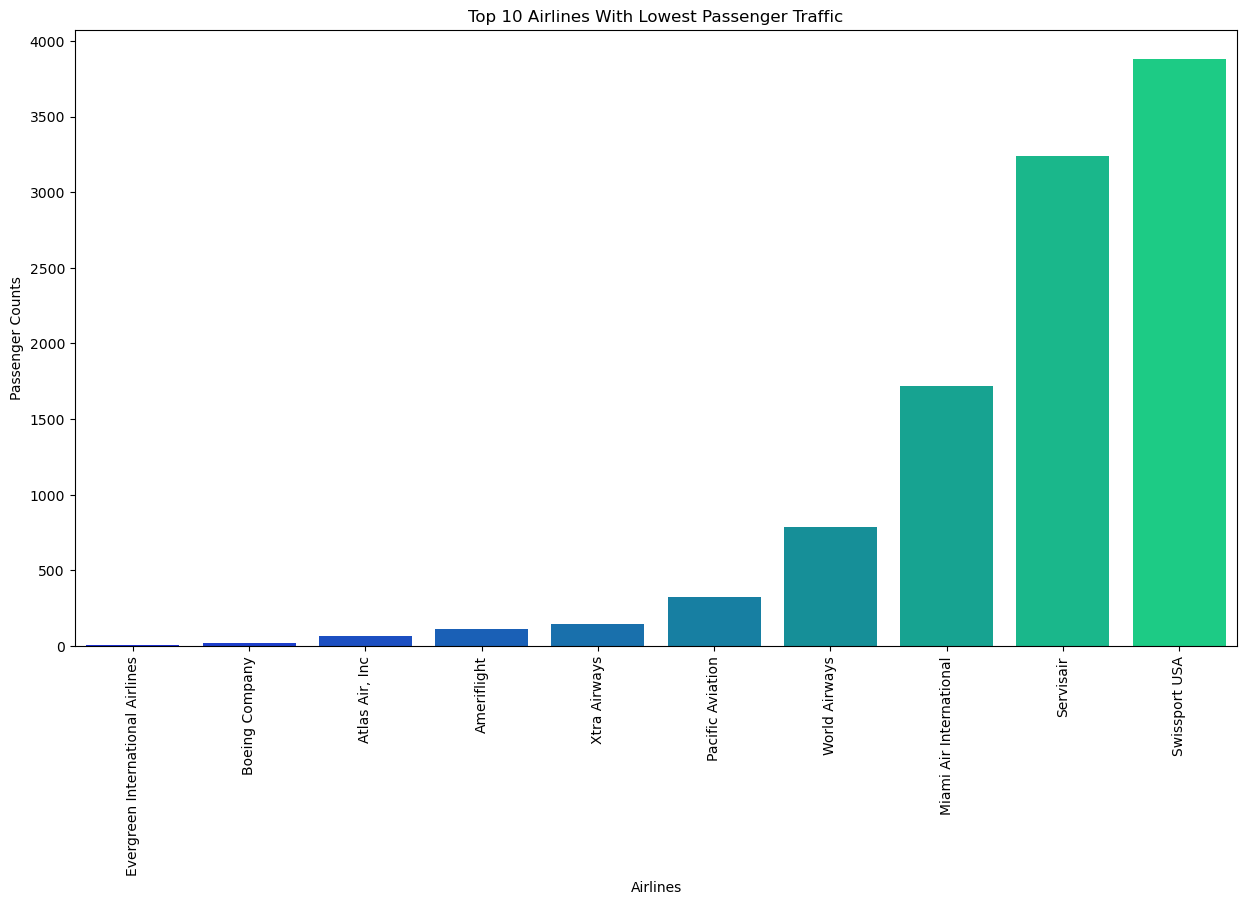

In [36]:
plt.figure(figsize=[15,8])
sb.barplot(x=lp2.index, y=lp2.values, palette='winter')
plt.title("Top 10 Airlines With Lowest Passenger Traffic")
plt.xlabel("Airlines")
plt.ylabel("Passenger Counts")
plt.xticks(rotation=90)
plt.show()

### The data indicates that Evergreen International Airlines, Boeing Company, Atlas Air Inc and Ameriflight are among the least preferred carriers, as they consistently records the lowest passenger traffic throughout the observed years.

### Distribution Of Passenger Traffic Over All Airlines:

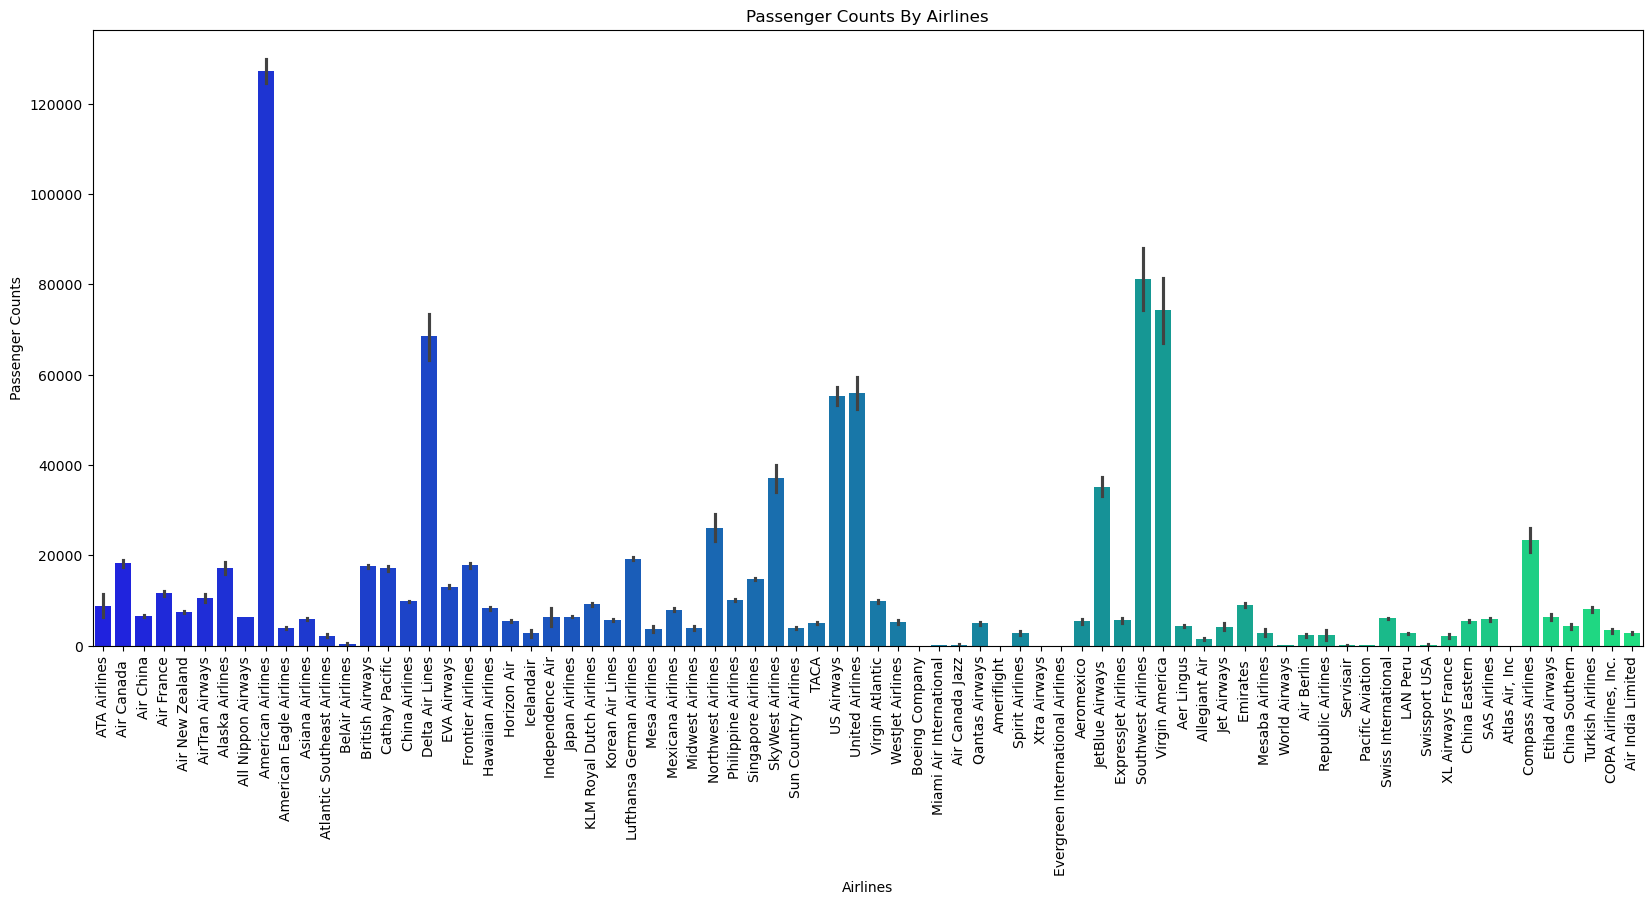

In [37]:
plt.figure(figsize=[20,8])
sb.barplot(x=df.Operating_Airline, y=df.Passenger_Count, palette='winter')
plt.title("Passenger Counts By Airlines")
plt.xlabel("Airlines")
plt.ylabel("Passenger Counts")
plt.xticks(rotation=90)
plt.show()

### This analysis reveals that, among the many airlines evaluated, a few carriers exhibit exceptionally high average passenger volumes, far surpassing others by substantial margins. 
### Notably, American Airlines records average passenger traffic exceeding 120,000, followed by Southwest Airlines with approximately 80,000, and Virgin America with total surpassing 70,000.

# Terminal & Boarding Area Analysis:

### Finding Which Terminal & Boarding Area Are The Busiest In Terms Of Passenger Traffic:

In [38]:
tb1 = df.groupby(['Terminal', 'Boarding_Area'])['Passenger_Count'].sum().sort_values(ascending=False).reset_index()
tb1

,Terminal,Boarding_Area,Passenger_Count
0,Terminal 3,F,138526673
1,Terminal 1,B,67373108
2,International,A,57670570
3,International,G,57613844
4,Terminal 1,C,42271640
5,Terminal 3,E,40886909
6,Terminal 2,D,34060240
7,Terminal 1,A,409316
8,Other,Other,200


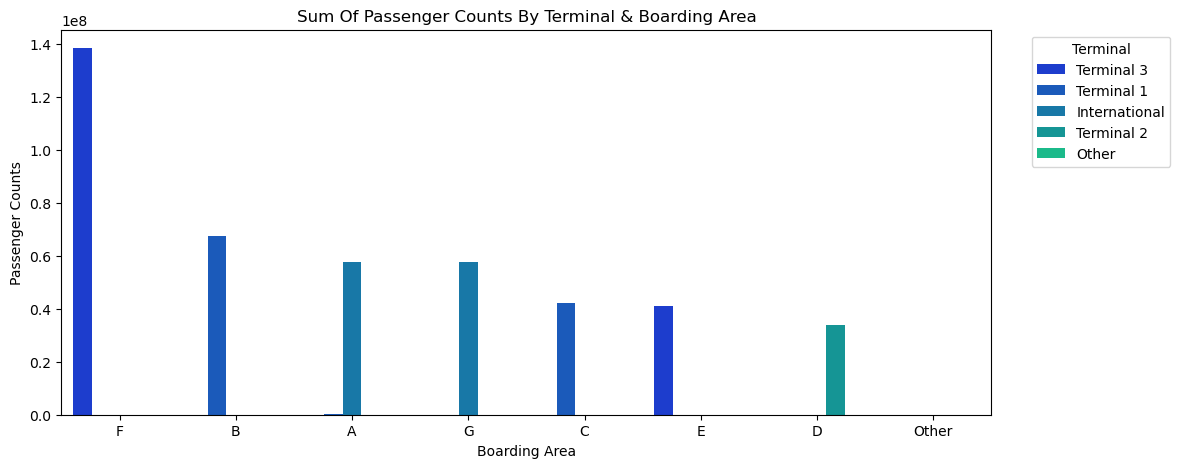

In [46]:
plt.figure(figsize=[12,5])
sb.barplot(x=tb1.Boarding_Area, y=tb1.Passenger_Count, hue=tb1.Terminal, palette='winter')
plt.title("Sum Of Passenger Counts By Terminal & Boarding Area")
plt.xlabel("Boarding Area")
plt.ylabel("Passenger Counts")
plt.legend(title='Terminal',bbox_to_anchor=(1.2,1.0))
plt.show()

### The visualization indicates that Boarding Area F in Terminal 3 records the highest passenger volume. 
### This suggests that the area experiences consistently heavy foot traffic and, therefore, holds significant potential for enhanced commercial development. 
### Passenger traffic in Area A & G is primarily generated by individuals traveling internationally, either departing from or arriving into another country.
### In Area B, the majority of passenger traffic consists of individuals traveling between cities, reflecting predominantly domestic travel patterns.
### The high passenger concentration implies that expanding or optimizing commercial services in this area could generate substantial economic benefits and improve overall passenger experience.
### Also other area has the lowest passenger traffic.